In [14]:
%load_ext autoreload

%autoreload

import json
import numpy as np
from registration_utils.data_loading import load_images
from registration_utils.utils import rgb_to_gray, compute_scaling_factor, rescale_img, pad_img, invert_img, normalize_pixel_values
from registration_utils.plot_helper_functions import plot_two_imgs
from registration_utils.lightglue_reg import put_everything_together

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'lightglue'

In [2]:
data = json.load(open("/home/zeynepboztoprak/code/my_own_registration/registration/registration_utils/pli_big_brain_paths.json", "r"))
print(data.keys())

BF_PYRAMID_LVL = '00'
MOD_PYRAMID_LVL = '06'

BF_UM_PER_PX = 32.18880081176758
MOD_UM_PER_PX = 1.33

bf_masks = data['BF-Mask']
mod_masks = data['MOD-Mask']
transmittance = data['Transmittance']
direction = data['Direction']
retardation = data['Retardation']
blockface = data['Blockface']

dict_keys(['Transmittance', 'Retardation', 'Direction', 'BF-Mask', 'Blockface', 'MOD-Mask'])


In [3]:
data = load_images(data, "920", BF_PYRAMID_LVL, MOD_PYRAMID_LVL)

In [4]:
for k in data.keys():
    print(data[k].shape)

(1329, 1855)
(1329, 1855)
(1329, 1855)
(3648, 5472)
(3648, 5472, 3)
(1329, 1855)


In [5]:
bf_img = data['Blockface'][:]
bf_img = rgb_to_gray(bf_img)

print('Blockface converted:', bf_img.shape)

Blockface converted: (3648, 5472)


In [6]:
int_bf_pyramid_lvl = int(BF_PYRAMID_LVL)
int_mod_pyramid_lvl = int(MOD_PYRAMID_LVL)

print(int_bf_pyramid_lvl)
print(int_mod_pyramid_lvl)

scaling_factor = compute_scaling_factor(fixed_um_per_px=BF_UM_PER_PX, moving_um_per_px=MOD_UM_PER_PX, fixed_pyramid_lvl=int_bf_pyramid_lvl, moving_pyramid_lvl=int_mod_pyramid_lvl)

print('scaling factor:', scaling_factor)

0
6
scaling factor: 2.644397984807245


(3514, 4905) (3648, 5472)


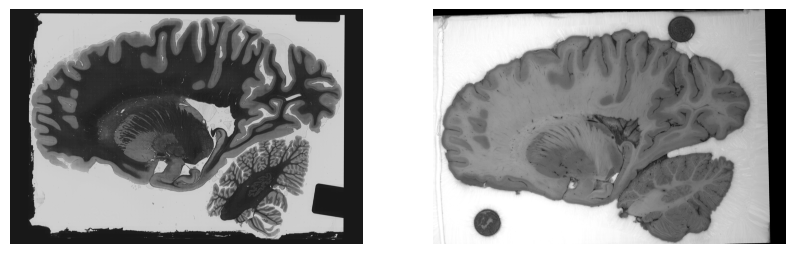

In [7]:
trans_img = data['Transmittance'][:]
trans_img = rescale_img(trans_img, scaling_factor, bf_img.shape)

print(trans_img.shape, bf_img.shape)

plot_two_imgs(pad_img(trans_img, bf_img.shape), bf_img)

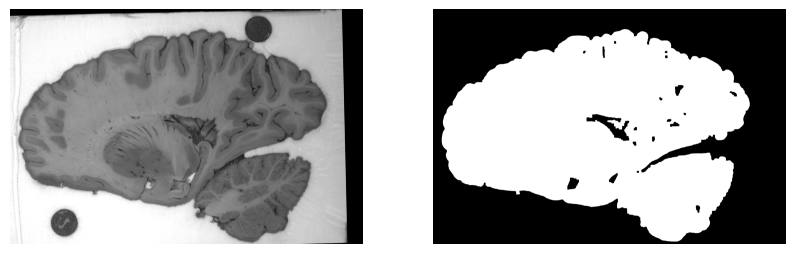

[  0 255]


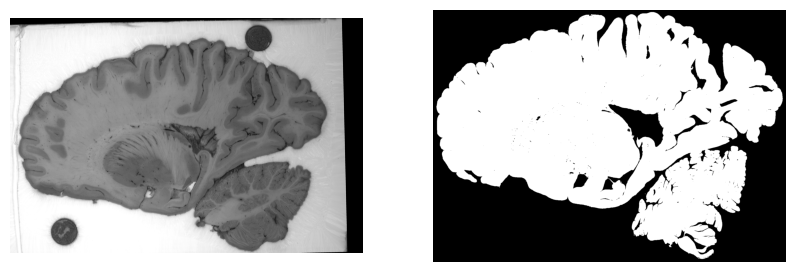

[  0 255]


In [8]:
mask_img = data['BF-Mask'][:] 

plot_two_imgs(bf_img, mask_img)

print(np.unique(mask_img))

mask_img = data['MOD-Mask'][:] 

plot_two_imgs(bf_img, mask_img)

print(np.unique(mask_img))

In [9]:
bf_mask_img = data['BF-Mask'][:]
mod_mask_img = data['MOD-Mask'][:]

bf_mask_img[bf_mask_img < 127] = 0 
bf_mask_img[bf_mask_img >= 127] = 255

mod_mask_img[mod_mask_img < 127] = 0 
mod_mask_img[mod_mask_img >= 127] = 255

In [10]:
inv_trans_img = invert_img(trans_img)
inv_bf_img = invert_img(bf_img)

In [11]:
print(np.max(inv_trans_img), np.min(inv_trans_img))
print(np.max(inv_bf_img), np.min(inv_bf_img))
print(np.max(trans_img), np.min(trans_img))
print(np.max(bf_img), np.min(bf_img))

5437.7637 0.0
255 0
4925.357 -512.40686
255 0


In [12]:
bf_img = normalize_pixel_values(bf_img)
trans_img = normalize_pixel_values(trans_img)
inv_bf_img = normalize_pixel_values(inv_bf_img)
inv_trans_img = normalize_pixel_values(inv_trans_img)

In [13]:
print(np.max(inv_trans_img), np.min(inv_trans_img))
print(np.max(inv_bf_img), np.min(inv_bf_img))
print(np.max(trans_img), np.min(trans_img))
print(np.max(bf_img), np.min(bf_img))

1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
